### Домашнее задание 

#### 1. Возьмите датасет Mortality and Water Hardness
https://www.kaggle.com/ukveteran/mortality-and-water-hardness \
В этом датасете содержатся данные по средней годовой смертности на \
100000 населения и концентрации кальция в питьевой воде для 61 \
большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.

#### 2. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
>Построить точечный график \
Рассчитать коэффициенты корреляции Пирсона и Спирмена \
Построить модель линейной регрессии \
Рассчитать коэффициент детерминации \
Вывести график остатков

#### 3. Задание
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
>Разделить данные на 2 группы \
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv('water.csv') 
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [106]:
colors = {'South' : 'y',
          'North' : 'b'}

#### Строим точечный график

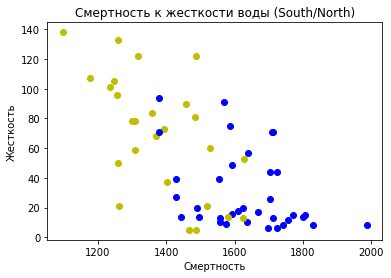

In [107]:
for i in range(len(df)):
    plt.scatter(df['mortality'][i], df['hardness'][i], c=colors[df['location'][i]])
plt.title('Смертность к жесткости воды (South/North)')
plt.xlabel('Смертность')
plt.ylabel('Жесткость')
plt.show()

#### Рассчитываем коэффициенты корреляции Пирсона и Спирмена

<font color='red'>*буду признателен, если подскажите как можно раскрасить точки по городам без применения цикла</font>

In [180]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [156]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


#### Строим модель линейной регрессии

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [158]:
X = df[['hardness']]
y = df['mortality']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [160]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [161]:
model.coef_

array([-3.13167087])

In [162]:
model.intercept_

1668.9722977277095

In [163]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [166]:
result = X_test.copy()
result['y_pred'] = y_pred
result['y_test'] = y_test
result

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


#### Рассчитываем коэффициент детерминации

In [167]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5046490611017092

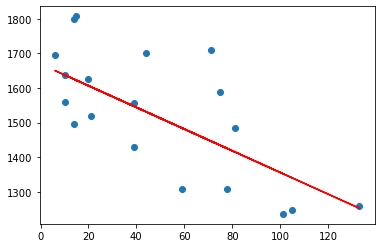

In [168]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

#### Выводим график остатков

In [169]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [174]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

In [176]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           7.83e-06
Time:                        10:11:00   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

In [177]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const       1668.972298
hardness      -3.131671
dtype: float64
R2:  0.3967890100912279


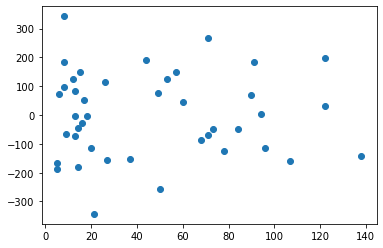

In [178]:
# посмотрим на остатки
plt.scatter(X_const.iloc[:, 1], results.resid)

### Все тоже самое, но для каждой группы в отдельности

========================== Локация городов: South ==========================



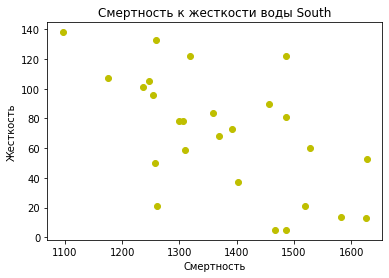

Корреляции

считаем коэф. корреляции Пирсона
           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000

считаем коэф. корреляции Спирмана
           mortality  hardness
mortality   1.000000 -0.595723
hardness   -0.595723  1.000000

Строим модель линейной регрессии

коэффициент: [-3.51342921]
независимый член: 1640.2204603423374

Рассчитываем коэффициент детерминации
-2.551922301235205



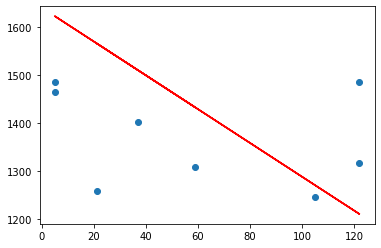

Выводим график остатков
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           7.30e-05
Time:                        10:33:35   Log-Likelihood:                -106.97
No. Observations:                  18   AIC:                             217.9
Df Residuals:                      16   BIC:                             219.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1640.2205     54

D:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


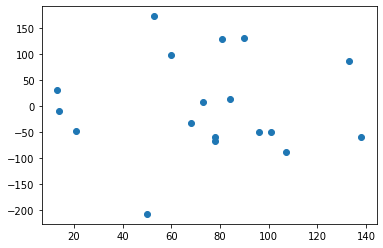


========================== Локация городов: North ==========================



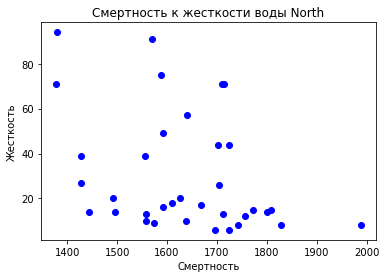

Корреляции

считаем коэф. корреляции Пирсона
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000

считаем коэф. корреляции Спирмана
           mortality  hardness
mortality   1.000000 -0.404208
hardness   -0.404208  1.000000

Строим модель линейной регрессии

коэффициент: [-1.97686226]
независимый член: 1688.150229031281

Рассчитываем коэффициент детерминации
0.018885304285745863



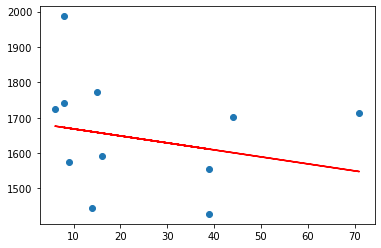

Выводим график остатков
                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 10 Apr 2021   Prob (F-statistic):             0.0316
Time:                        10:33:37   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37

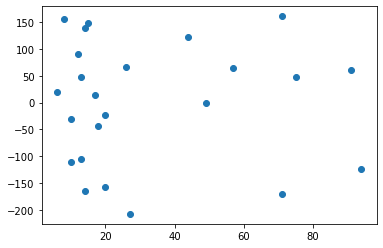

In [193]:
for location in colors.keys():
    print(f'========================== Локация городов: {location} ==========================')
    print()
    # график
    df_slt = df.loc[df['location'] == location]
    plt.scatter(df_slt['mortality'], df_slt['hardness'], c=colors[location])
    plt.title(f'Смертность к жесткости воды {location}')
    plt.xlabel('Смертность')
    plt.ylabel('Жесткость')
    plt.show()
    
    # корреляции
    print('Корреляции')
    print()
    print('считаем коэф. корреляции Пирсона')
    print(df_slt[['mortality', 'hardness']].corr())
    print()
    print('считаем коэф. корреляции Спирмана')
    print(df_slt[['mortality', 'hardness']].corr(method='spearman'))
    print()
    
    # модель линейной регрессии
    print('Строим модель линейной регрессии')
    print()
    
    X = df_slt[['hardness']]
    y = df_slt['mortality']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты
    
    print(f'коэффициент: {model.coef_}')
    print(f'независимый член: {model.intercept_}')
    print()
    
    y_pred = model.predict(X_test)

    result = X_test.copy()
    result['y_pred'] = y_pred
    result['y_test'] = y_test

    # коэффициент детерминации
    print('Рассчитываем коэффициент детерминации')
    print(model.score(X_test, y_test)) # метод возвращает значение коэффициента детерминации
    print()

    plt.scatter(X_test, y_test)
    plt.plot(X_test, y_pred, c='r')
    plt.show()

    # Выводим график остатков
    print('Выводим график остатков')
    X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу
    model = sm.OLS(y_train, X_const)
    results = model.fit()
    print(results.summary())
    print()

    print('Parameters: ', results.params)
    print('R2: ', results.rsquared)
    print()

    # посмотрим на остатки
    print('посмотрим на остатки')
    plt.scatter(X_const.iloc[:, 1], results.resid)
    plt.show()
    print()